In [1]:
import os
import cv2
import numpy as np
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from shutil import copyfile
import matplotlib.pyplot as plt

MENYAMBUNGKAN KE DRIVE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**PATH TEMPAT DATASET**

In [4]:
source_path = '/content/drive/MyDrive/datasets'

source_path_normals = os.path.join(source_path, 'normal')
source_path_cataracts = os.path.join(source_path, 'cataract')
source_path_glaucoma = os.path.join(source_path, 'glaucoma')
source_path_konjungtivitis = os.path.join(source_path, 'konjungtivitis')

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_normals))} images of normals.")
print(f"There are {len(os.listdir(source_path_cataracts))} images of cataracts.")
print(f"There are {len(os.listdir(source_path_glaucoma))} images of glaucomas.")
print(f"There are {len(os.listdir(source_path_konjungtivitis))} images of konjungtivitis.")

There are 66 images of normals.
There are 37 images of cataracts.
There are 35 images of glaucomas.
There are 37 images of konjungtivitis.


**MEMBAGI DATASET KE TRAIN DAN VAL**

In [ ]:
# def split_data(source_dir, training_dir, validation_dir, split_size):

#   source_path = os.listdir(source_dir)
#   num_files = len(source_path)
#   shuffled = random.sample(source_path, num_files)

#   count_train = int(num_files*split_size)
#   count_validation = num_files-count_train

#   for i in range(count_train):
#       source = os.path.join(source_dir, shuffled[i])
#       if os.path.getsize(source)==0:
#           print(f"{shuffled[i]}, is zero length, so ignoring.")
#       else:
#           target = os.path.join(training_dir, shuffled[i])
#           copyfile(source, target)

#   for i in range(count_train, num_files):
#       source = os.path.join(source_dir, shuffled[i])
#       if os.path.getsize(source) ==0:
#           print(f"{shuffled[i]}, is zero length, so ignoring.")
#       else:
#           target = os.path.join(validation_dir, shuffled[i])
#           copyfile(source, target)
#   pass

In [ ]:
# # Test your split_data function

# # Define paths
# normal_source_dir = "/content/drive/MyDrive/dataset/normal/"
# cataract_source_dir = "/content/drive/MyDrive/dataset/cataract/"

# training_dir = "/content/drive/MyDrive/normals-v-cataracts/training/"
# validation_dir = "/content/drive/MyDrive/normals-v-cataracts/validation/"

# train_normal_dir = os.path.join(training_dir, "normals/")
# val_normal_dir = os.path.join(validation_dir, "normals/")

# train_cataract_dir = os.path.join(training_dir, "cataracts/")
# val_cataract_dir = os.path.join(validation_dir, "cataracts/")

# # Empty directories in case you run this cell multiple times
# if len(os.listdir(train_normal_dir)) > 0:
#   for file in os.scandir(train_normal_dir):
#     os.remove(file.path)
# if len(os.listdir(train_cataract_dir)) > 0:
#   for file in os.scandir(train_cataract_dir):
#     os.remove(file.path)
# if len(os.listdir(val_normal_dir)) > 0:
#   for file in os.scandir(val_normal_dir):
#     os.remove(file.path)
# if len(os.listdir(val_cataract_dir)) > 0:
#   for file in os.scandir(val_cataract_dir):
#     os.remove(file.path)

# # Define proportion of images used for training
# split_size = .9

# # Run the function
# # NOTE: Messages about zero length images should be printed out
# split_data(normal_source_dir, train_normal_dir, val_normal_dir, split_size)
# split_data(cataract_source_dir, train_cataract_dir, val_cataract_dir, split_size)

# # Check that the number of images matches the expected output

# # Your function should perform copies rather than moving images so original directories should contain unchanged images
# print(f"\n\nOriginal normal's directory has {len(os.listdir(normal_source_dir))} images")
# print(f"Original cataract's directory has {len(os.listdir(cataract_source_dir))} images\n")

# # Training and validation splits
# print(f"There are {len(os.listdir(train_normal_dir))} images of normals for training")
# print(f"There are {len(os.listdir(train_cataract_dir))} images of cataracts for training")
# print(f"There are {len(os.listdir(val_normal_dir))} images of normals for validation")
# print(f"There are {len(os.listdir(val_cataract_dir))} images of cataracts for validation")



Original normal's directory has 40 images
Original cataract's directory has 41 images

There are 36 images of normals for training
There are 36 images of cataracts for training
There are 4 images of normals for validation
There are 5 images of cataracts for validation


**MENAMPILKAN SAMPLE GAMBAR**

In [ ]:
# #tampilkan gambar

# print("Sample normal image:")
# plt.imshow(load_img(f"{os.path.join(train_normal_dir, os.listdir(train_normal_dir)[0])}"))
# plt.show()

# print("\nSample cataract image:")
# plt.imshow(load_img(f"{os.path.join(train_cataract_dir, os.listdir(train_cataract_dir)[0])}"))
# plt.show()

**UBAH KE GRAYSCALE**

In [ ]:
# import cv2
# import numpy as np
# from google.colab.patches import cv2_imshow

# def grayscale_manual(img):
#     # Mengubah citra berwarna menjadi grey scale secara manual
#     height, width, _ = img.shape
#     img_gray = np.zeros((height, width), dtype=np.uint8)

#     for i in range(height):
#         for j in range(width):
#             # Ambil nilai intensitas warna pada saluran merah (R), hijau (G), dan biru (B)
#             r, g, b = img[i, j]

#             # Hitung nilai intensitas warna abu-abu
#             gray = int(0.299 * r + 0.587 * g + 0.114 * b)

#             # Set nilai intensitas warna abu-abu pada citra grey scale
#             img_gray[i, j] = gray

#     return img_gray

# # Choose an example image from the training set
# sample_image_path = os.path.join(train_normal_dir, os.listdir(train_normal_dir)[0])

# # Membaca citra berwarna
# img = cv2.imread(sample_image_path)

# # Pemeriksaan apakah citra berhasil dibaca atau tidak
# if img is None:
#     print("Error: Citra tidak dapat dibaca.")
# else:
#     # Mengubah citra berwarna menjadi grey scale secara manual
#     gray_image = np.mean(img, axis=2)

#     # Menampilkan citra berwarna dan citra grey scale
#     plt.imshow(gray_image, cmap='gray')
#     plt.title('Grayscale Image')
#     plt.show()

In [5]:
traindir = "drive/MyDrive/datasets"
validdir = "drive/MyDrive/datasets"

**AUGMENTATION**

In [6]:
# grader-required-cell

# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1./255,
                                    #  rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                    #  shear_range=0.2,
                                    #  zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1./255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))

  return train_generator, validation_generator

In [7]:
# Test your generators
train_generator, validation_generator = train_val_generators(traindir, validdir)

Found 175 images belonging to 4 classes.
Found 175 images belonging to 4 classes.


**define the architecture of the model that will be trained.**

In [8]:
from tensorflow.keras.optimizers import RMSprop
# GRADED FUNCTION: create_model
def create_model():

  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Flatten(),

      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),

      tf.keras.layers.Dense(4, activation='softmax')
  ])


  model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model

**LET'S SEE**

In [9]:
# Get the untrained model
model = create_model()

# Train the model
history = model.fit(train_generator,
                    epochs=400,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/400
6/6 [==============================] - 36s 6s/step - loss: 1.7003 - accuracy: 0.2743 - val_loss: 1.3708 - val_accuracy: 0.3771
Epoch 2/400
6/6 [==============================] - 3s 556ms/step - loss: 1.3905 - accuracy: 0.3771 - val_loss: 1.3766 - val_accuracy: 0.3771
Epoch 3/400
6/6 [==============================] - 5s 802ms/step - loss: 1.3767 - accuracy: 0.3771 - val_loss: 1.3607 - val_accuracy: 0.3771
Epoch 4/400
6/6 [==============================] - 3s 543ms/step - loss: 1.3704 - accuracy: 0.3771 - val_loss: 1.3547 - val_accuracy: 0.3771
Epoch 5/400
6/6 [==============================] - 3s 601ms/step - loss: 1.3674 - accuracy: 0.3771 - val_loss: 1.3529 - val_accuracy: 0.3771
Epoch 6/400
6/6 [==============================] - 3s 542ms/step - loss: 1.3554 - accuracy: 0.3771 - val_loss: 1.3532 - val_accuracy: 0.3771
Epoch 7/400
6/6 [==============================] - 5s 952ms/step - loss: 1.3564 - accuracy: 0.3771 - val_loss: 1.3460 - val_accuracy: 0.3771
Epoch 8/400
6/6

**HITUNG AKURASI RATA-RATA**

In [10]:
# Tampilkan nilai akurasi rata-rata
average_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])
print(f"Average Accuracy: {average_accuracy}")

Average Accuracy: 0.8293714270740747


**LET'S SEE THE GRAPH**

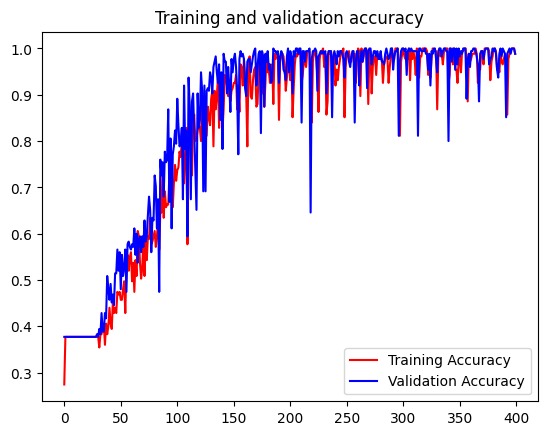

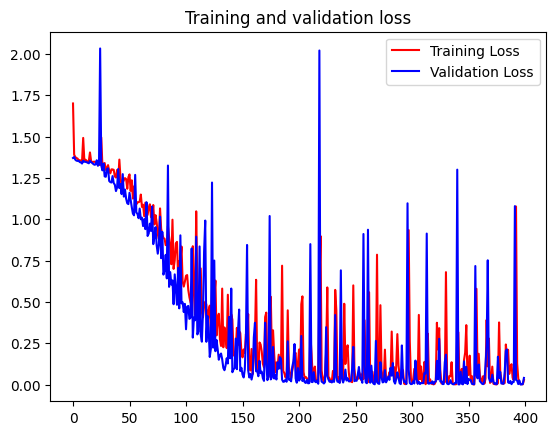

In [11]:
import matplotlib.pyplot as plt

# Retrieve a list of list results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label="Training Accuracy")    # Memberi warna merah pada garis training accuracy
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")  # Memberi warna biru pada garis validation accuracy
plt.title('Training and validation accuracy')
plt.legend()  # Menampilkan legenda
plt.show()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")    # Memberi warna merah pada garis training loss
plt.plot(epochs, val_loss, 'b', label="Validation Loss")  # Memberi warna biru pada garis validation loss
plt.legend()  # Menampilkan legenda
plt.title('Training and validation loss')
plt.show()

H5 File

In [12]:
if __name__ == '__main__':
    model.save("model_docpet.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
from google.cloud import storage

def upload_to_gcs(bucket_name, source_file_path, destination_blob_name, credentials_file):
    storage_client = storage.Client.from_service_account_json(credentials_file)

    bucket = storage_client.bucket(bucket_name)

    blob = bucket.blob(destination_blob_name)
    blob.upload_from_filename(source_file_path)

    print(f"File {source_file_path} uploaded to gs://{bucket_name}/{destination_blob_name}")

BUCKET_NAME = "docpet-machine-learning-models"
SOURCE_FILE_PATH = "model_docpet.h5"
DESTINATION_BLOB_NAME = "model_docpet.h5"
CREDENTIALS_FILE = "docpet-project-ch2-ps068-a53f10c5c713.json"
upload_to_gcs(BUCKET_NAME, SOURCE_FILE_PATH, DESTINATION_BLOB_NAME, CREDENTIALS_FILE)

File model_docpet.h5 uploaded to gs://docpet-machine-learning-models/model_docpet.h5


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
# import numpy as np

# # Load and preprocess the image
# img_path = 'kucing.png'  # Replace with the path to your image
# img = image.load_img(img_path, target_size=(224, 224))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array = preprocess_input(img_array)

# # Make predictions
# predictions = model.predict(img_array)
